# KNN Implementation

In [16]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### UMAP without SMOTE

c:\Users\codyb\.vscode\Py\COMP7970-Homework\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\codyb\.vscode\Py\COMP7970-Homework\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


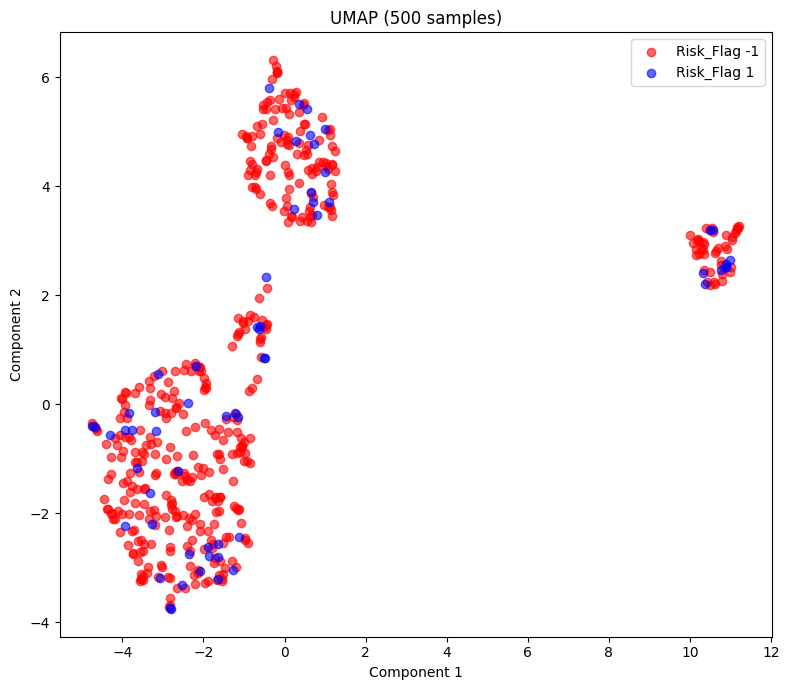

In [17]:
X_sample, _, y_sample, _ = train_test_split(
    X_train_scaled, y_train, train_size=500, stratify=y_train, random_state=9
)

# Only UMAP this time
umap_model = umap.UMAP(n_components=2, random_state=9)
X_umap = umap_model.fit_transform(X_sample)

fig, ax = plt.subplots(figsize=(8, 7))

ax.scatter(X_umap[y_sample == 0, 0], X_umap[y_sample == 0, 1],
           c='red', label='Risk_Flag -1', alpha=0.6)
ax.scatter(X_umap[y_sample == 1, 0], X_umap[y_sample == 1, 1],
           c='blue', label='Risk_Flag 1', alpha=0.6)

ax.set_title("UMAP (500 samples)")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend()

plt.tight_layout()
plt.show()

### UMAP with SMOTE

c:\Users\codyb\.vscode\Py\COMP7970-Homework\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\codyb\.vscode\Py\COMP7970-Homework\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


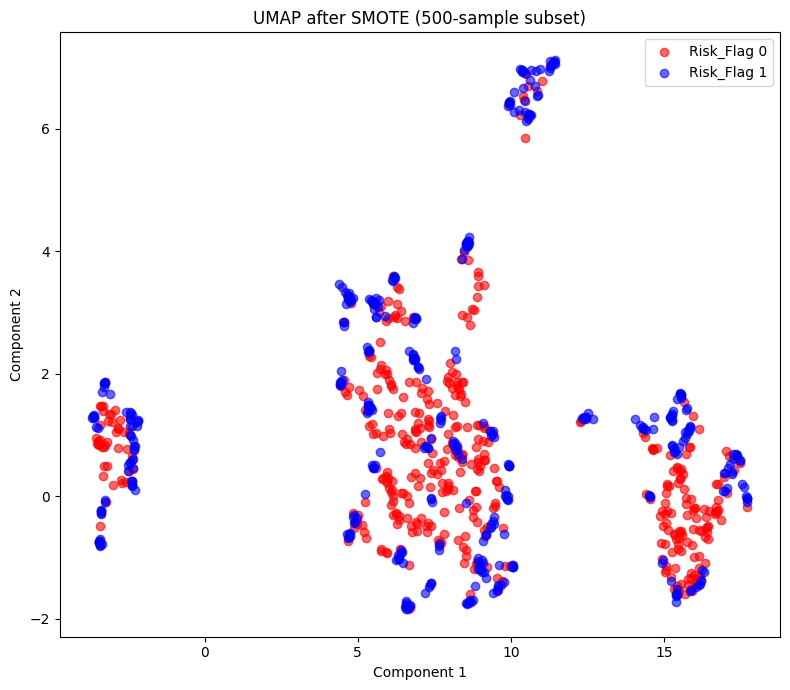

In [18]:
sm = SMOTE(random_state=9)
X_res, y_res = sm.fit_resample(X_sample, y_sample)

umap = umap.UMAP(n_components=2, random_state=9)
X_umap = umap.fit_transform(X_res)

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(X_umap[y_res == 0, 0], X_umap[y_res == 0, 1],
           c='red',   label='Risk_Flag 0', alpha=0.6)
ax.scatter(X_umap[y_res == 1, 0], X_umap[y_res == 1, 1],
           c='blue',  label='Risk_Flag 1', alpha=0.6)
ax.set_title("UMAP after SMOTE (500-sample subset)")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.legend()
plt.tight_layout()
plt.show()

### Train and Test with SMOTE

In [19]:
# SMOTE sets
X_train_sm, y_train_sm = SMOTE(random_state=9).fit_resample(X_train_scaled, y_train)

ks = [1, 3, 5, 7, 9, 15]
for k in ks:
    print(f"k = {k}\n")
    
    # Without SMOTE
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"No SMOTE -> Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # With SMOTE
    knn_sm = KNeighborsClassifier(n_neighbors=k)
    knn_sm.fit(X_train_sm, y_train_sm)
    y_pred_sm = knn_sm.predict(X_test_scaled)
    print(f"With SMOTE -> Accuracy: {accuracy_score(y_test, y_pred_sm):.4f}")
    print(classification_report(y_test, y_pred_sm, zero_division=0))

k = 1

No SMOTE -> Accuracy: 0.8781
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     44147
           1       0.51      0.48      0.49      6253

    accuracy                           0.88     50400
   macro avg       0.72      0.71      0.71     50400
weighted avg       0.87      0.88      0.88     50400

With SMOTE -> Accuracy: 0.8688
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     44147
           1       0.47      0.50      0.49      6253

    accuracy                           0.87     50400
   macro avg       0.70      0.71      0.71     50400
weighted avg       0.87      0.87      0.87     50400

k = 3

No SMOTE -> Accuracy: 0.8850
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     44147
           1       0.54      0.47      0.51      6253

    accuracy                           0.89     50400
   macro avg       0.73  